# Descenso por gradiente en dos dimensiones

El descenso por gradiente es un algoritmo de optimización ampliamente utilizado para encontrar el mínimo local de una función diferenciable. Es especialmente fundamental en el campo del aprendizaje automático, donde se utiliza para minimizar una función de pérdida que mide el error de un modelo en función de sus parámetros.

El algoritmo se basa en el principio de que si la función es diferenciable en un punto, la dirección del gradiente en ese punto indica la dirección de mayor aumento. Por lo tanto, para encontrar un mínimo, se debe avanzar en la dirección opuesta al gradiente.

$$W_{\text{new}} = W_{\text{old}} - \eta \nabla_W \mathcal{L}$$

donde $\mathcal{L}$ es la función objetivo (función de pérdida en prendizaje), $\eta$ la tasa de aprendizaje y $W$ los parámetros de la función.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import nni

### Función esférica

La función esférica es una función comúnmente utilizada en optimización y análisis de algoritmos. Para el caso de dos dimensiones, la función esférica se puede describir usando las variables $x$ y $y$ como entradas. La forma de la función es:

$$
f(x, y) = x^2 + y^2
$$

$$
\frac{\partial f}{\partial x} = 2x
$$

$$
\frac{\partial f}{\partial y} = 2y
$$

La función tiene como mínimo global

$$
f(0,0) = 0
$$

In [2]:
problem = nni.SphereProblem()

x = np.linspace(problem.min_x, problem.max_x, 100)
y = np.linspace(problem.min_y, problem.max_y, 100)

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values using the function f
Z = problem.function(X, Y)

Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).


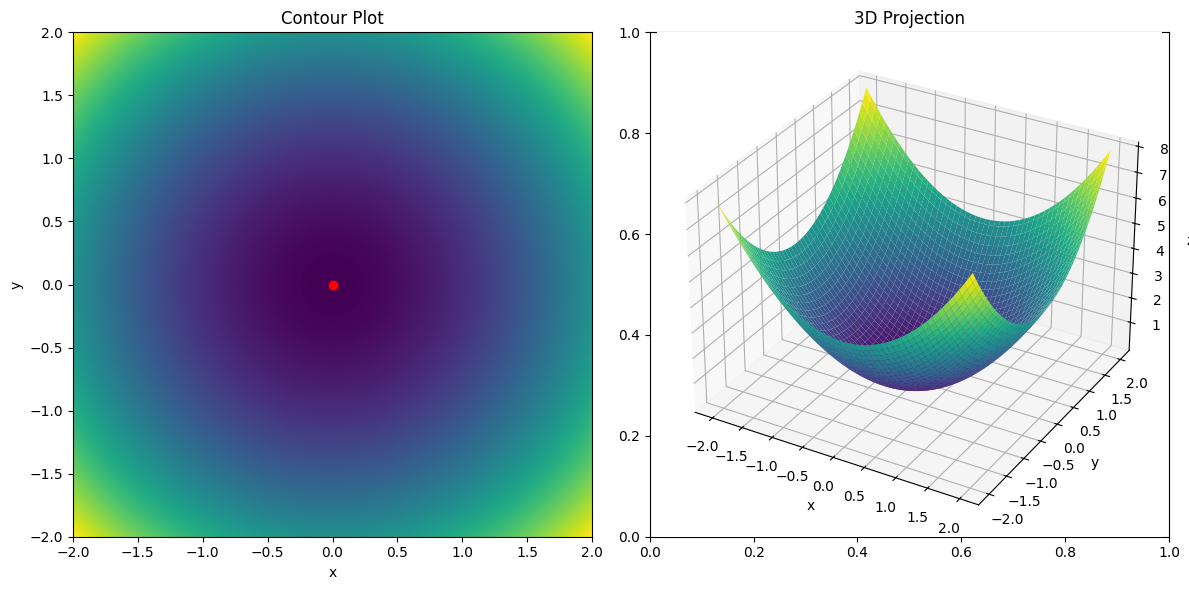

In [3]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the contour plot in the first subplot
ax1.contourf(X, Y, Z, levels=1000, cmap='viridis')
ax1.plot(problem.optimal_params[0], problem.optimal_params[1], 'ro')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Contour Plot')

# Plot the 3D projection in the second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('3D Projection')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [4]:
class Optimizer:
    def __init__(self, tolerance=1e-5):
        self.tolerance = tolerance
        self.history = []
        self.name = 'Optimizer'

class GradientDescentOptimizer(Optimizer):
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-5):
        super().__init__(tolerance=tolerance)
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.name = 'Descenso por gradiente'

    def next_params(self, gradient, params):
        return [param - self.learning_rate * grad_value for param, grad_value in zip(params, gradient)]
    
    def optimize(self, function, gradient, initial_params):
        self.history = []
        params = initial_params
        iteration = 0

        while iteration < self.max_iterations:
            log = {'iter': iteration, 'params': params, 'value': function(*params)}
            self.history.append(log)

            gradient_values = gradient(*params)
            updated_params = self.next_params(gradient_values, params)
            if self._converged(params, updated_params):
                break
            params = updated_params
            iteration += 1
        return params
    
    def _converged(self, params, updated_params):
        return all(abs(param - updated_param) < self.tolerance for param, updated_param in zip(params, updated_params))
    
    def get_history(self):
        return self.history
    

In [5]:
# -- hyperparameters --
# Initial guess
problem.set_initial_params([-1, -1.0])
# Learning rate
learning_rate = 0.01
# Maximum number of iterations
max_iterations = 300

In [6]:
optimizer = GradientDescentOptimizer(learning_rate=learning_rate, max_iterations=max_iterations, tolerance=1e-6)

# Optimize the function
optimized_params = optimizer.optimize(problem.function, lambda x, y: [problem.gradient_x(x, y), problem.gradient_y(x, y)], problem.initial_params)

print(f'Parámetros optimizados: {optimized_params}')
print(f'Mejor valor encontrado: {problem.function(*optimized_params)}')

Parámetros optimizados: [-0.002332505667951425, -0.002332505667951425]
Mejor valor encontrado: 1.0881165382051046e-05


Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).


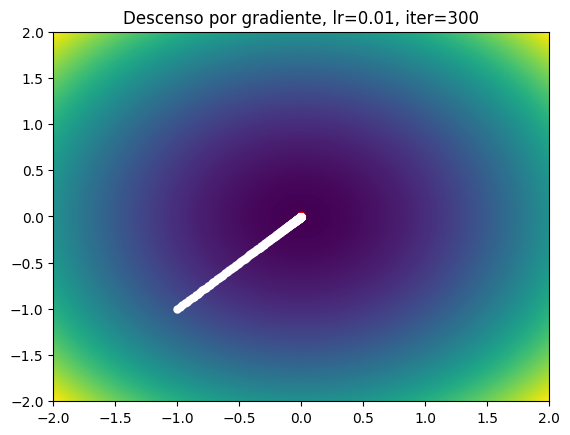

In [8]:
# Extract the x and y values from the history variable
history = optimizer.get_history()
x_values = [log['params'][0] for log in history]
y_values = [log['params'][1] for log in history]

# Create a 2D plot of the function
plt.contourf(X, Y, Z, levels=1000, cmap='viridis')
plt.plot(problem.optimal_params[0], problem.optimal_params[1], 'ro')
plt.plot(x_values, y_values, 'w.-', markersize=10)
plt.title(f'{optimizer.name}, lr={optimizer.learning_rate}, iter={len(history)}')
plt.show()

Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1001 ticks ([0.0, ..., 8.0]), which exceeds Locator.MAXTICKS (1000).


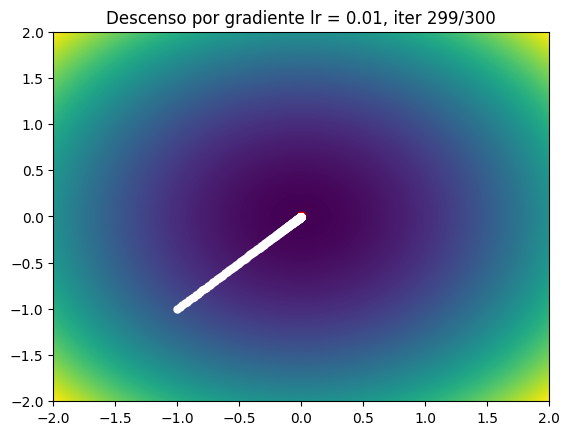

In [10]:
#Animate and save the optimization process
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=1000, cmap='viridis')
points = ax.scatter(x_values[0], y_values[0], c='w', s=10)

# Function to update the plot for each frame
def update(frame):
    # Clear the previous plot
    ax.cla()
    
    # Create a new contour plot
    contour = ax.contourf(X, Y, Z, levels=1000, cmap='viridis')
    plt.plot(problem.optimal_params[0], problem.optimal_params[1], 'ro')
    if frame > 0:
        # Plot the optimization path
        points = ax.plot(x_values[:frame], y_values[:frame], 'w.-', markersize=10)
    else:
        points = ax.scatter(x_values[:frame], y_values[:frame], c='w', s=10)
    # Update the title for each frame
    ax.set_title(f'{optimizer.name} lr = {optimizer.learning_rate}, iter {frame}/{len(x_values)}')

    return (contour, points)
    
# Create the animation
animation.FuncAnimation(fig, update, frames=len(x_values), interval=30).save('gradient_descent.mp4')
